In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import gaussian_kde
from scipy.stats import ttest_ind
from glob import glob
import h5py

types = ['Normal', 'high res', 'Y132F', 'G135D']
time = np.linspace(0,120,1201)

In [2]:
base_dir = '../run_sims/single_TCR/raw_trajectories/'

## Cluster Size Trace

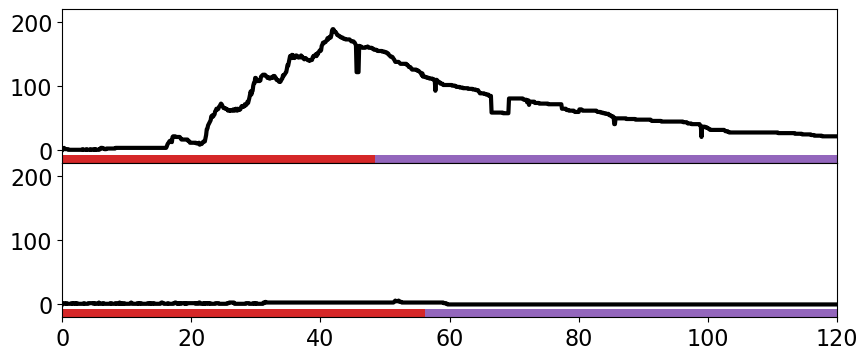

In [9]:
fig = plt.figure(figsize=[10,4])
time = np.array(range(1201))/10

for i,idx in enumerate([22,36]):

    nmol = h5py.File(f'{base_dir}/type0_{idx}_summary_funcs.h5','r')['num_mols'][:]
    cluster_size = h5py.File(f'{base_dir}/type0_{idx}_summary_funcs.h5','r')['cluster_size_distribution'][:]
    tcr = ~h5py.File(f'{base_dir}type0_{idx}_grid_trajs.h5','r')['source'][0,3,:,0].astype(bool)
    colors = plt.get_cmap('tab10')
    
    max_clust = np.tile(np.array(range(1,1501)).reshape([1,1500]),[1201,1])
    has_clust = cluster_size[0,:] > 0
    max_clust[~has_clust] = 0
    max_clust = np.max(max_clust,axis=1)

    plt.subplot(2,1,i+1)
    plt.plot(time,max_clust,'k-',linewidth=3)
    
    bar_thickness = 200/15
    plt.barh(-bar_thickness,120,height=bar_thickness,color=[0.576,0.4,0.737])
    plt.barh(-bar_thickness,max(time[tcr.T>0]),height=bar_thickness,color=[0.8352,0.1529,0.1568])
    
    
    plt.ylim([-1.5*bar_thickness,220])
    plt.xlim([0,120])
    
    plt.xticks([])
    plt.yticks([0,100,200],fontsize=16)

plt.xticks(range(0,121,20),fontsize=16)
fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig('example_max_clust_vs_time.png',dpi=1000,bbox_inches='tight')